In [475]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [476]:
hydro_data = pd.read_csv('RRCA_baseflow.csv')
hydro_data.columns

Index(['Date', 'Segment_id', 'x', 'y', 'Evapotranspiration', 'Precipitation',
       'Irrigation_pumping', 'Observed'],
      dtype='object')

In [477]:
hydro_data.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [478]:
hydro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                15591 non-null  int64  
 1   Segment_id          15591 non-null  int64  
 2   x                   15591 non-null  int64  
 3   y                   15591 non-null  int64  
 4   Evapotranspiration  15591 non-null  float64
 5   Precipitation       15591 non-null  float64
 6   Irrigation_pumping  15591 non-null  float64
 7   Observed            15591 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 974.6 KB


In [479]:
hydro_data = hydro_data.dropna()

In [480]:
from datetime import datetime, timedelta, date

hydro_data['Date'] = hydro_data['Date'] - 693963
start_date = date(1900, 1, 1)
hydro_data['Date'] = hydro_data['Date'].apply(lambda x : (start_date + timedelta(days=x)).month)


In [481]:
from sklearn.preprocessing import StandardScaler
cols = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']
scaler = StandardScaler()
hydro_data[cols] = scaler.fit_transform(hydro_data[cols])

In [482]:
hydro_data.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,11,144,1086190,14476800,-0.662268,0.387587,0.33141,-0.423674
1,12,144,1086190,14476800,-0.542286,1.399708,0.33141,-0.418343
2,1,144,1086190,14476800,-0.425461,1.399708,0.33141,-0.402579
3,2,144,1086190,14476800,-0.283376,1.399708,0.33141,-0.374147
4,3,144,1086190,14476800,1.750008,1.399708,0.33141,-0.359993


<AxesSubplot:xlabel='Irrigation_pumping', ylabel='Observed'>

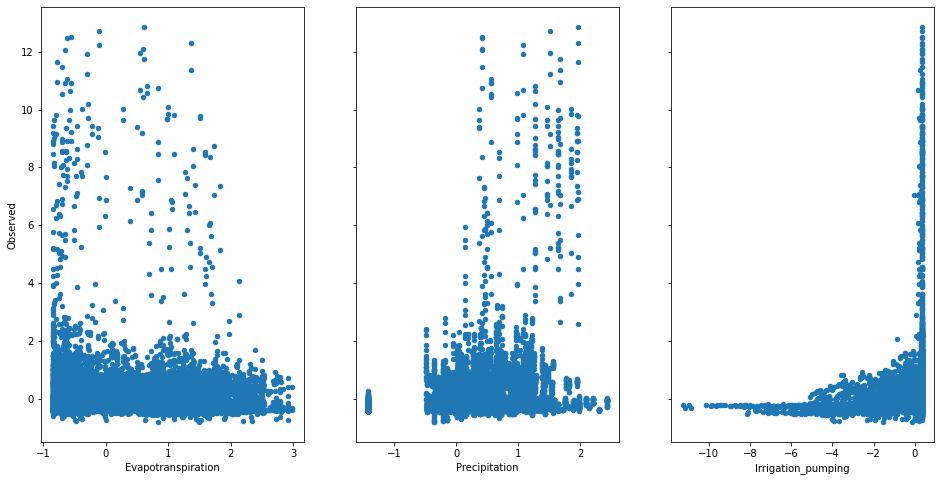

In [483]:
fig, axs = plt.subplots(1, 3, sharey=True)
hydro_data.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
hydro_data.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
hydro_data.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

/var/folders/3x/q2zxrlq942d7g8gj8_jynhwr0000gn/T/ipykernel_17623/2377049563.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 3, sharey=True)


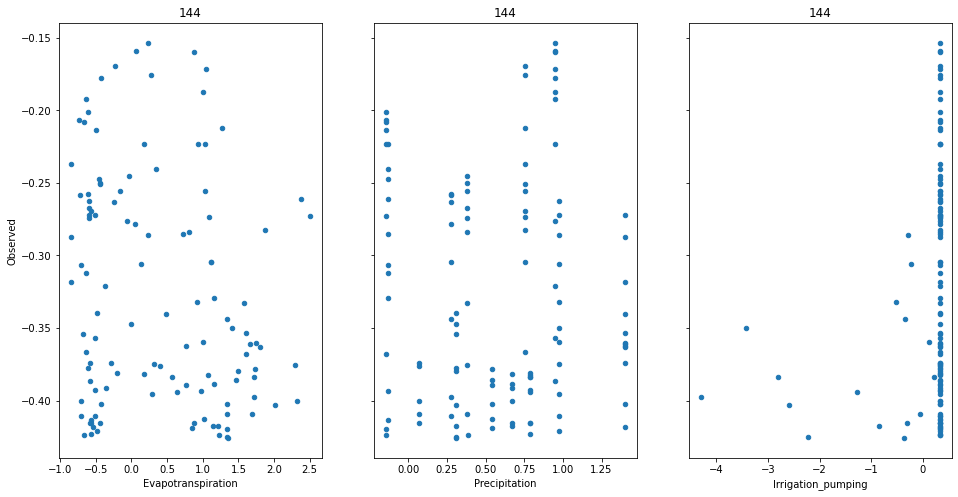

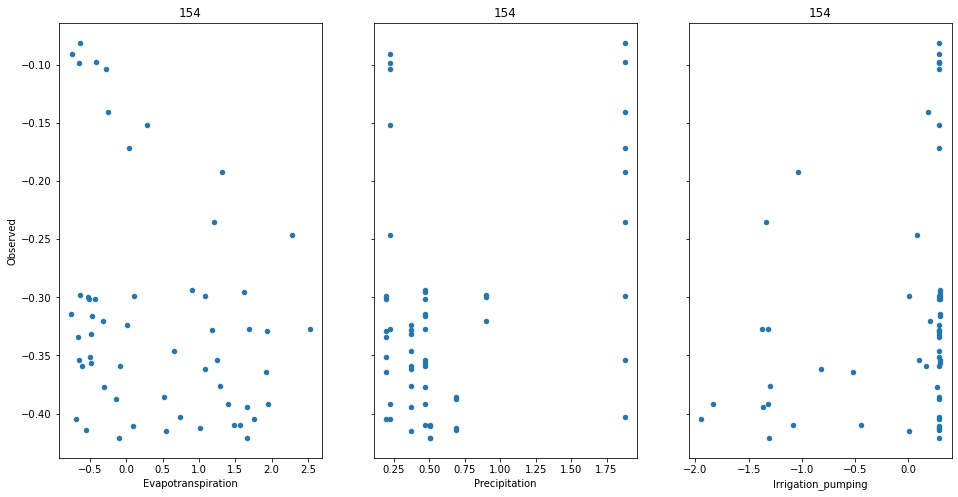

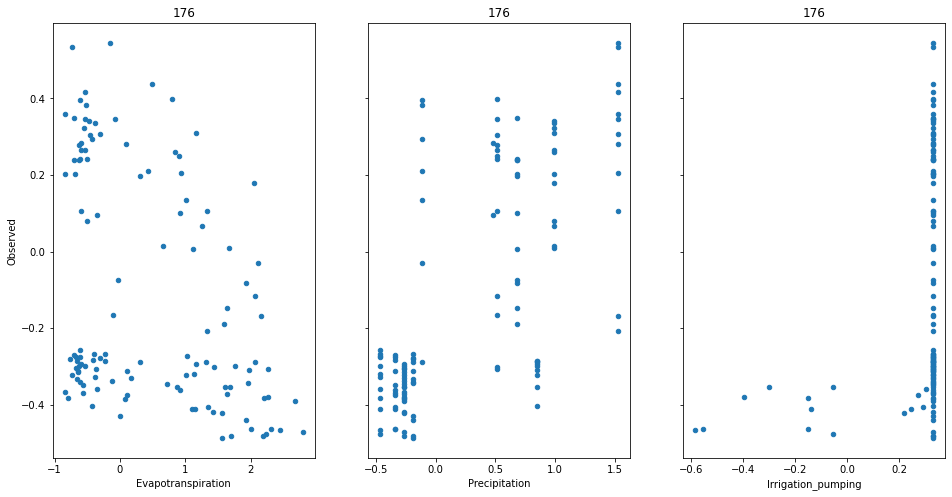

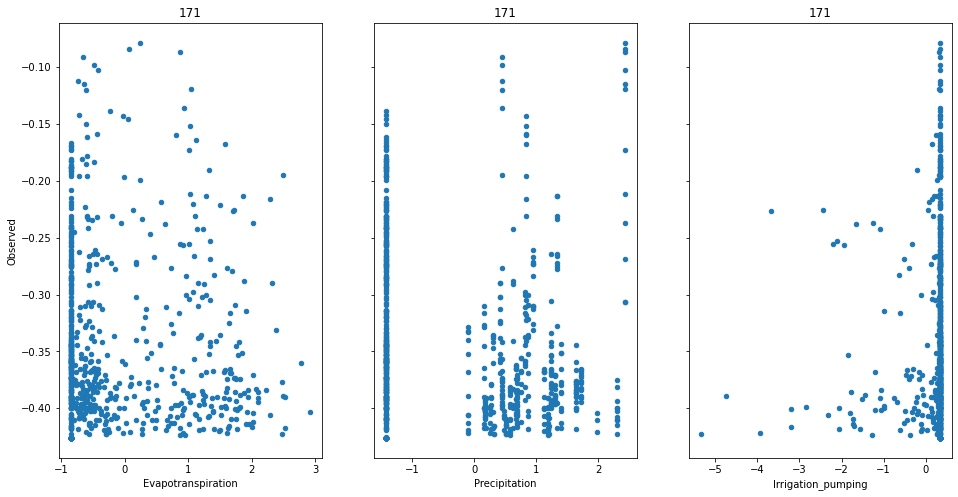

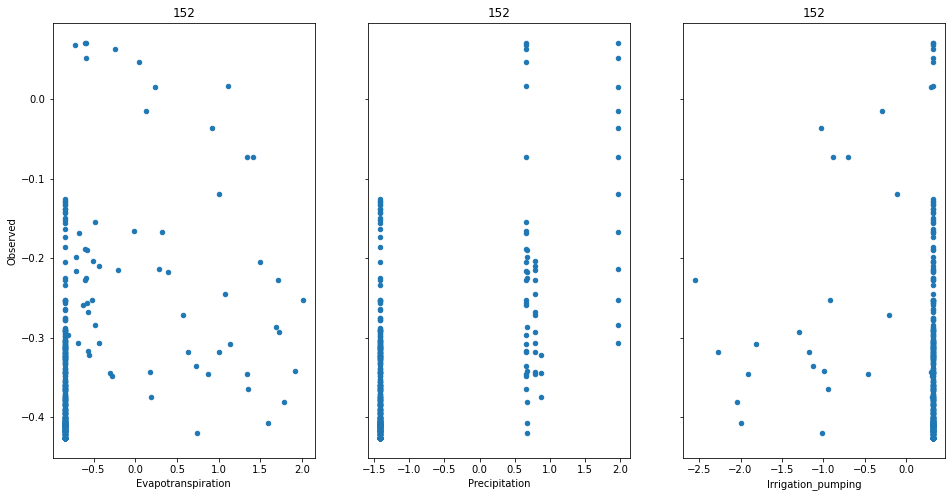

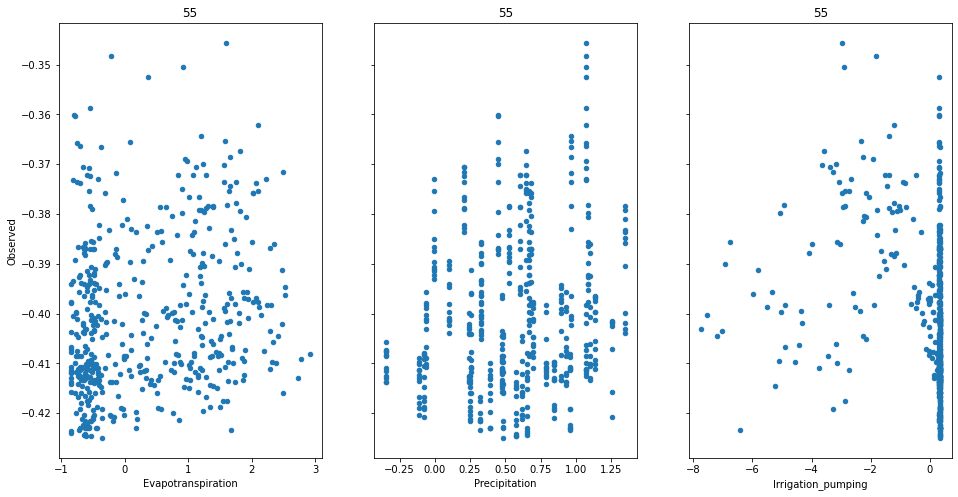

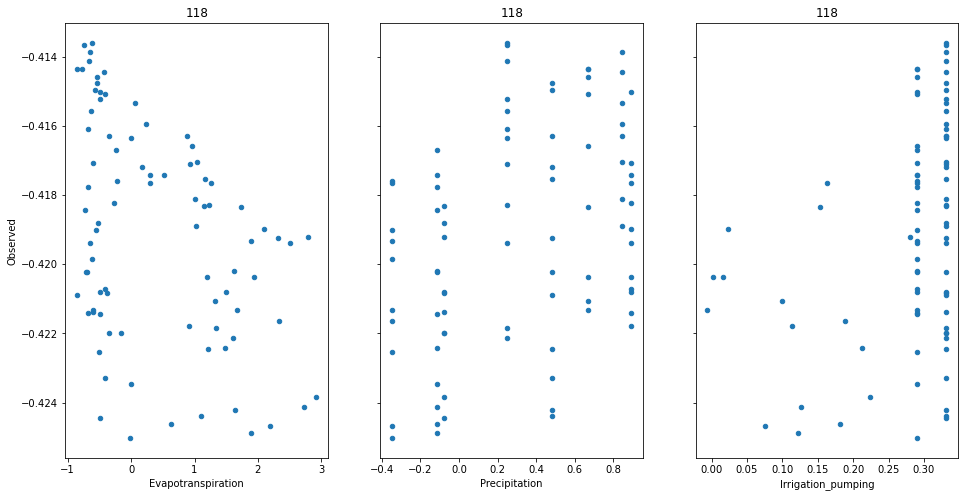

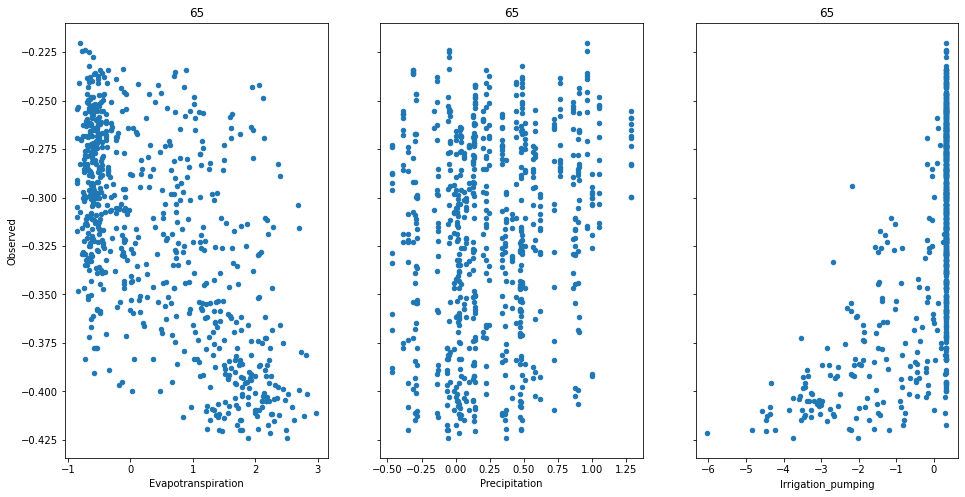

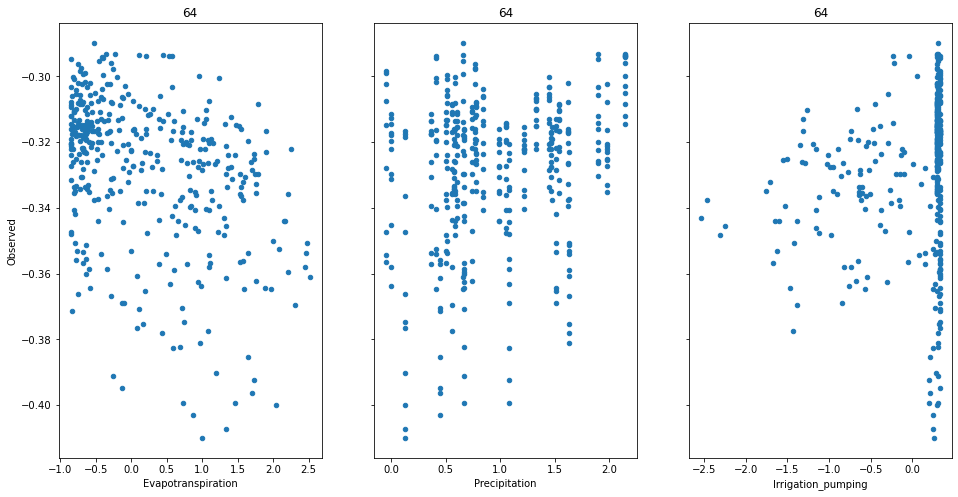

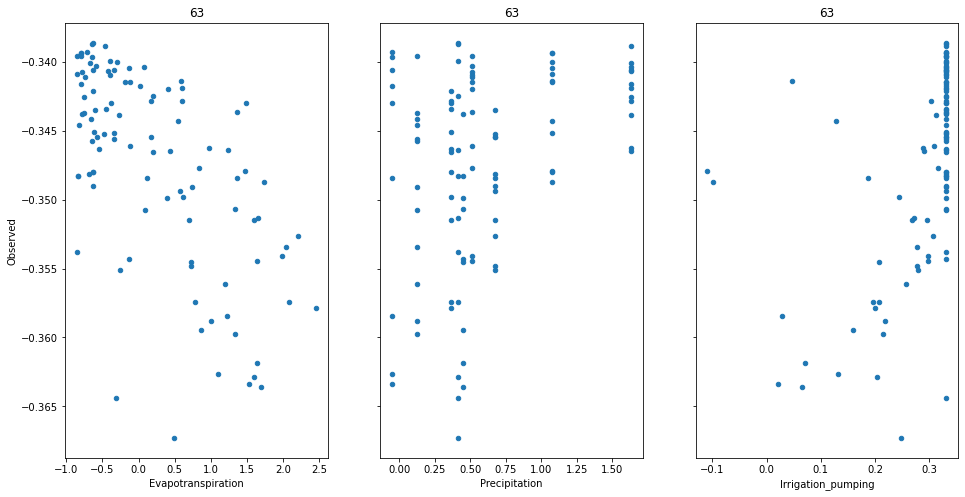

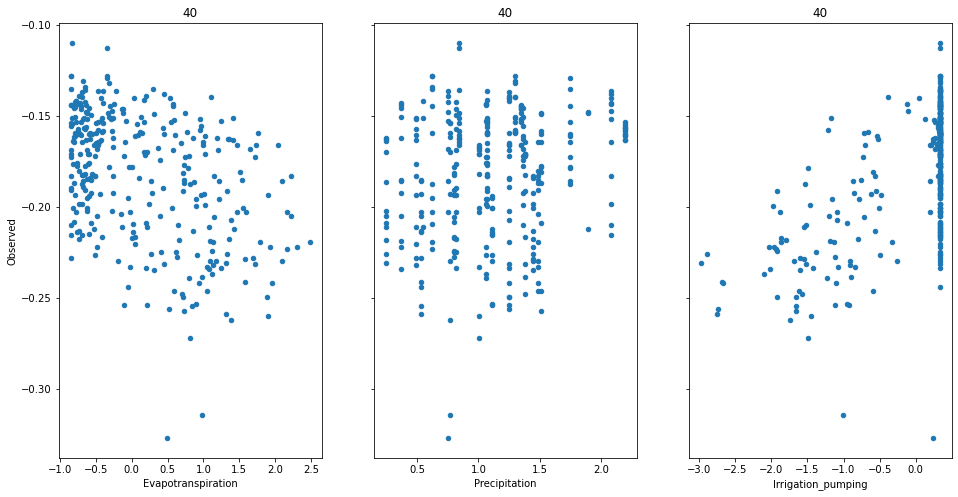

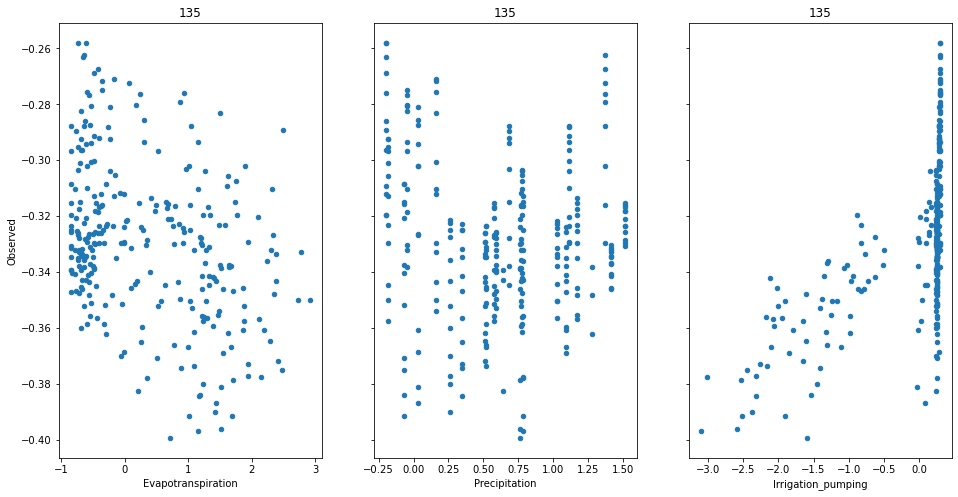

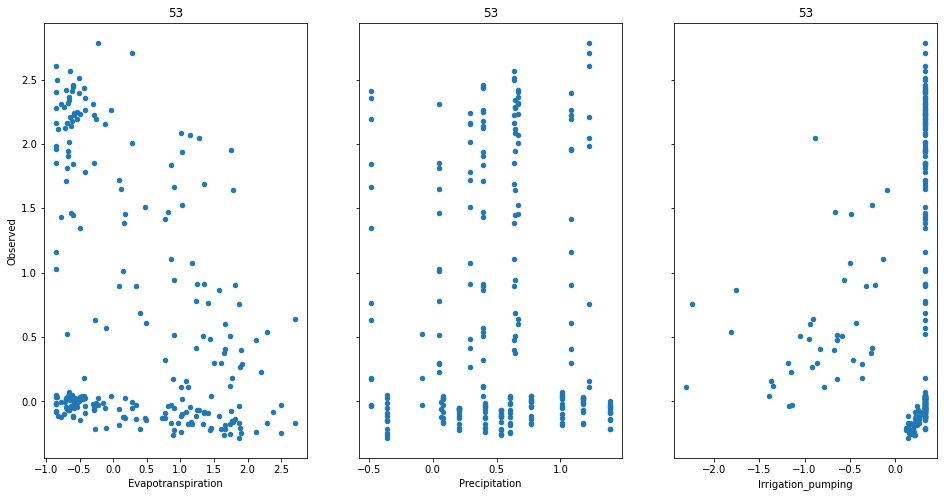

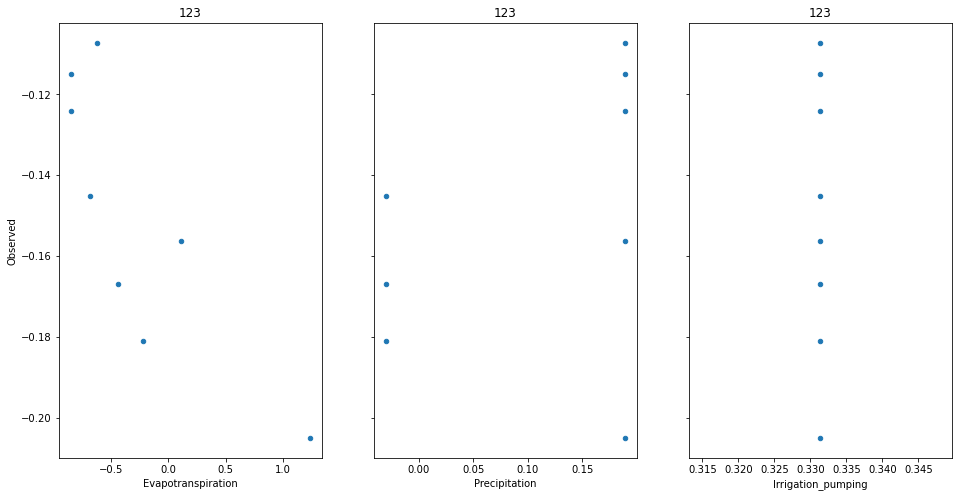

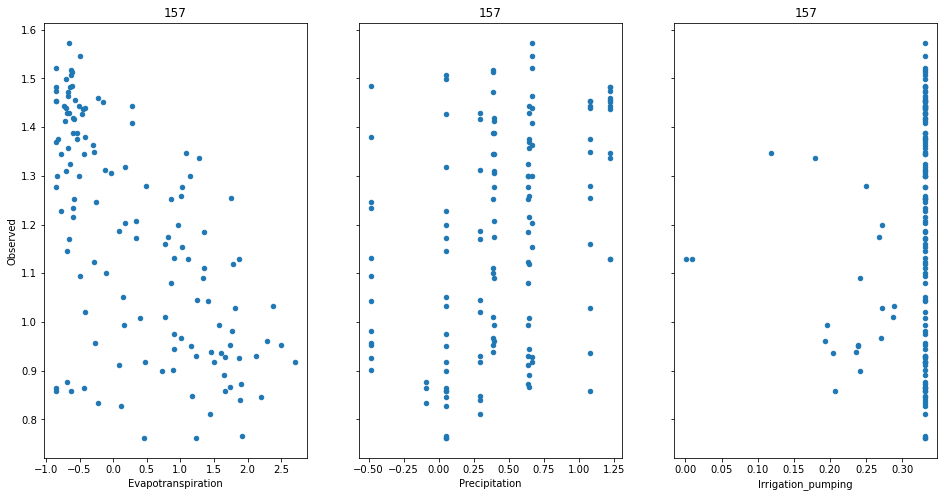

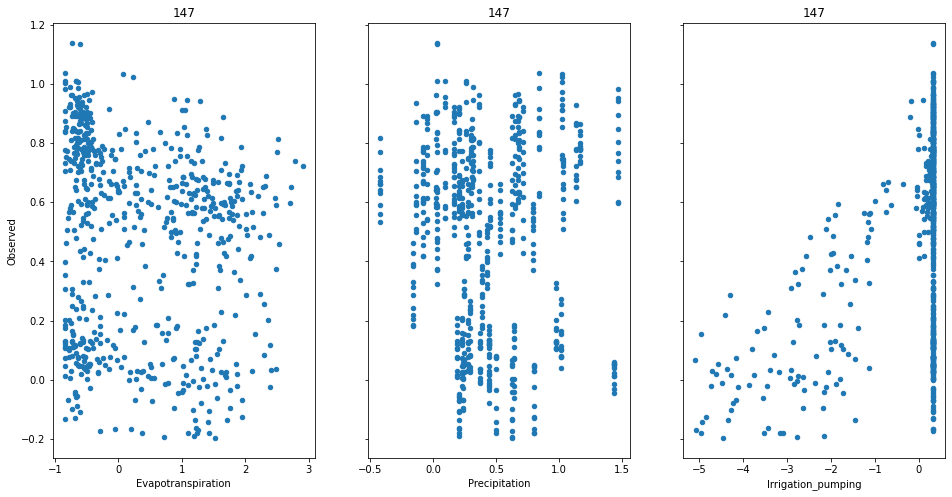

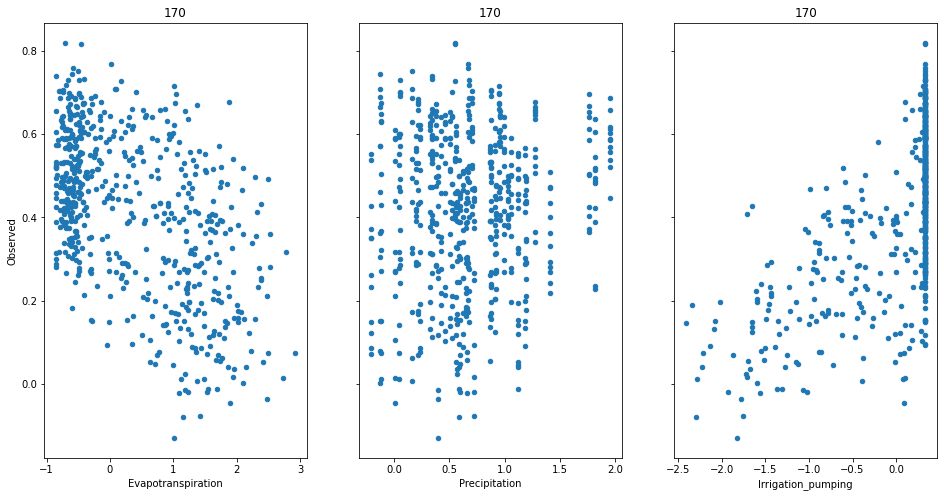

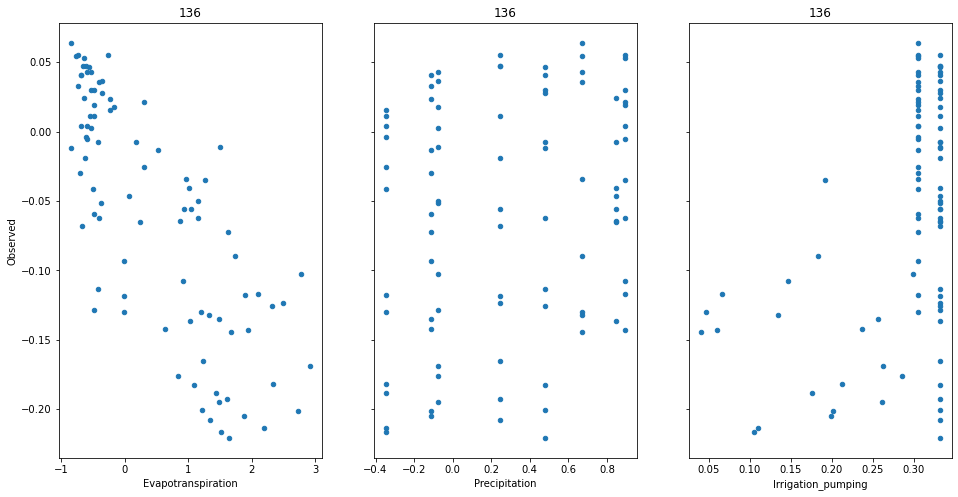

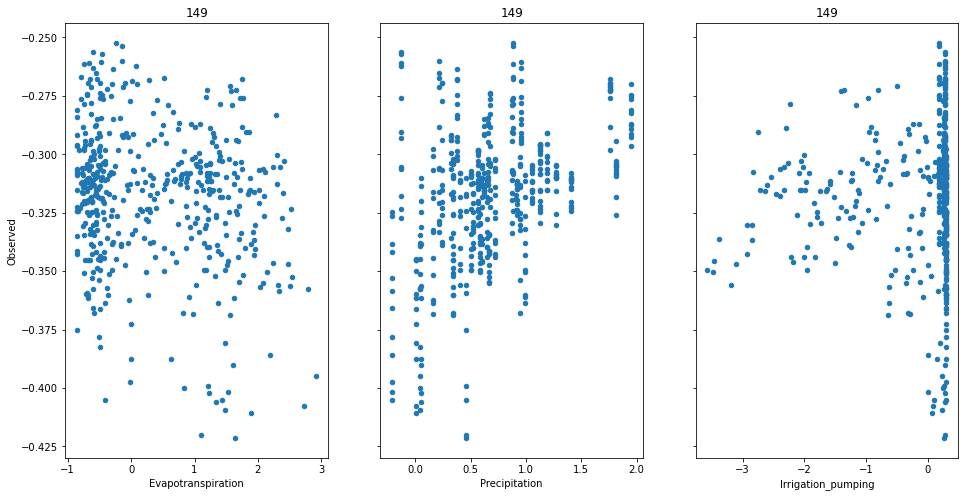

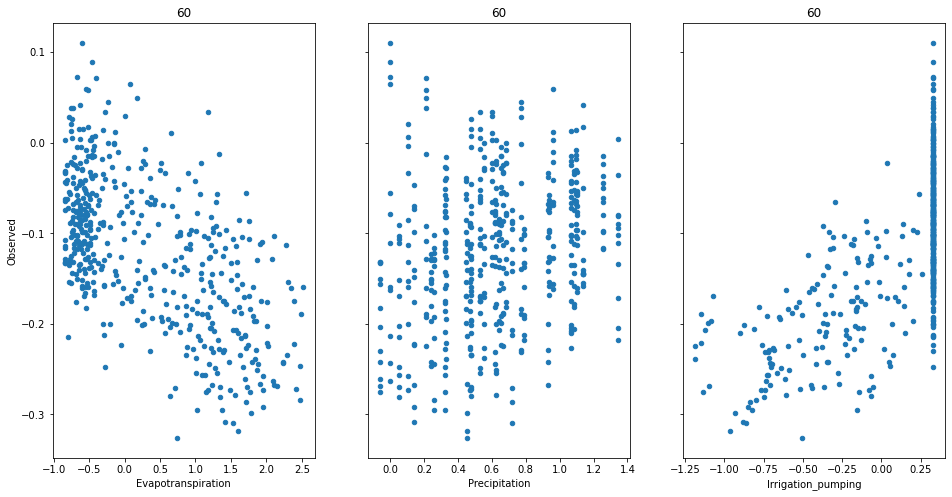

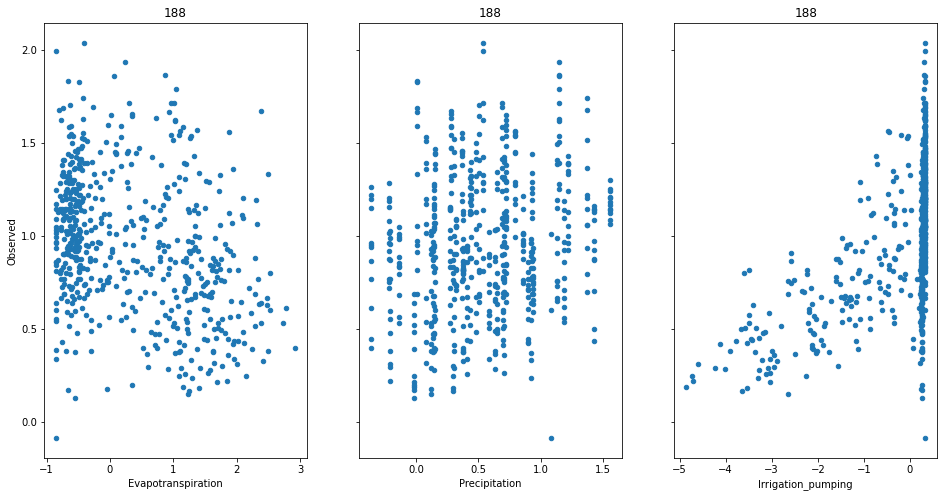

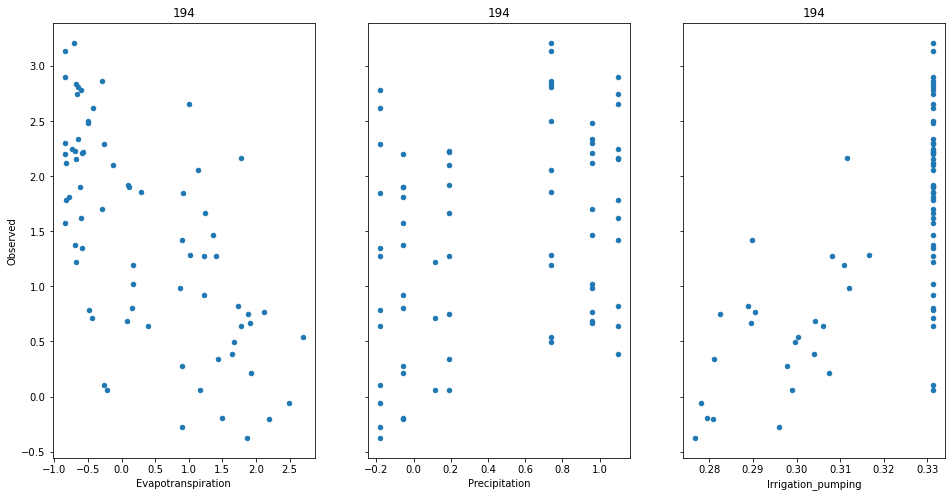

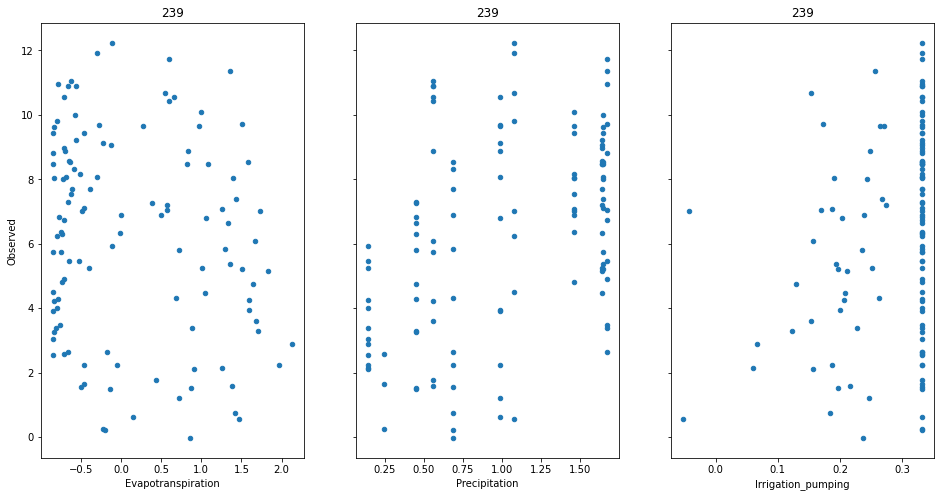

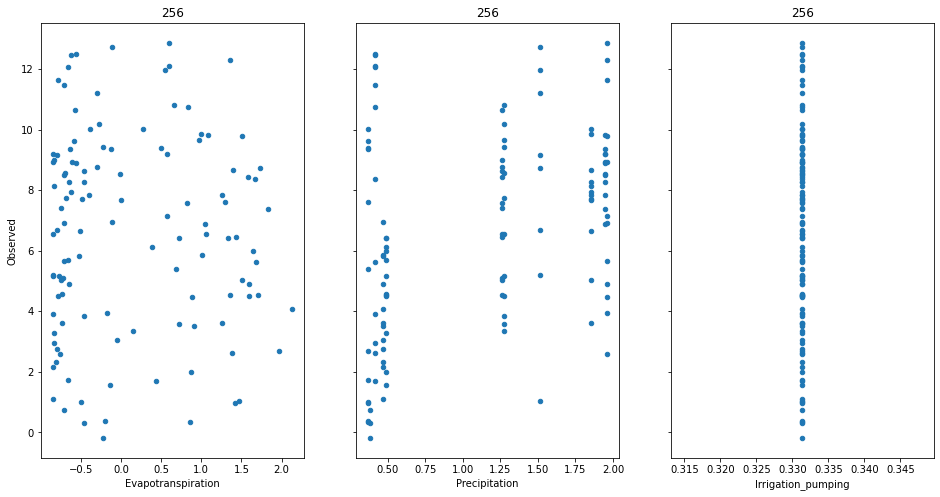

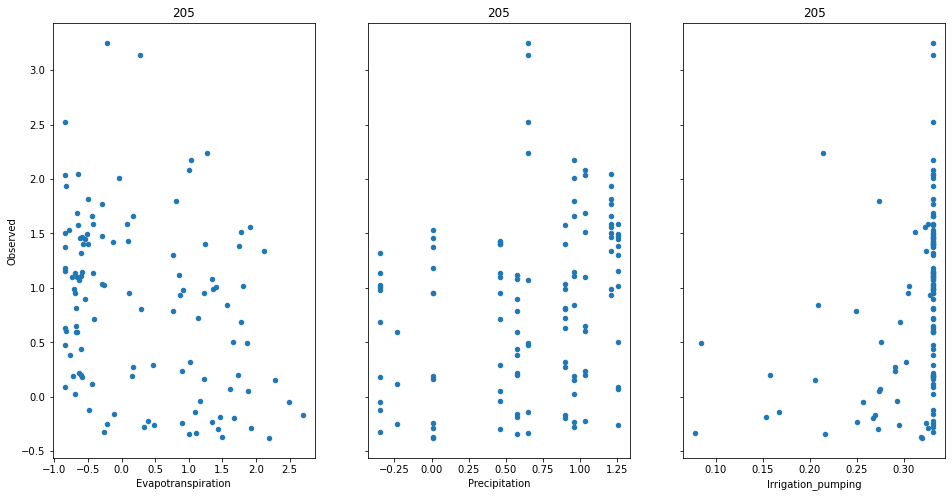

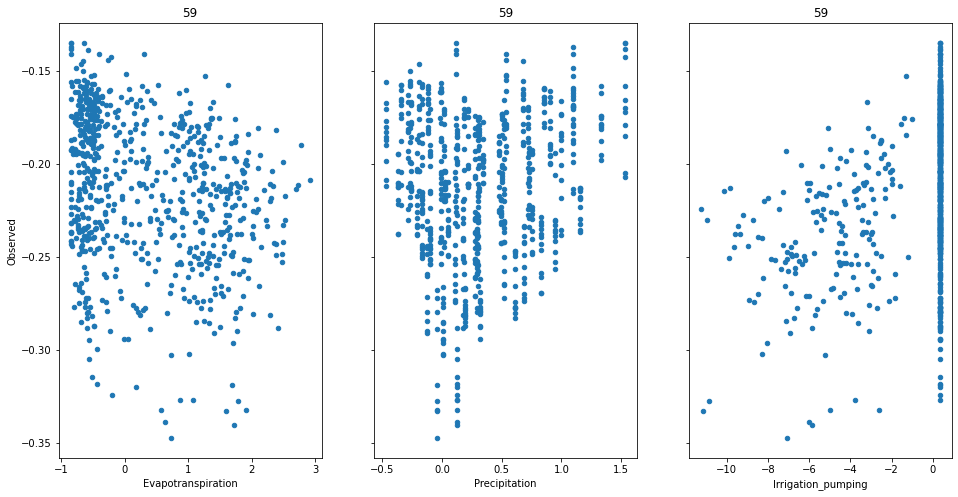

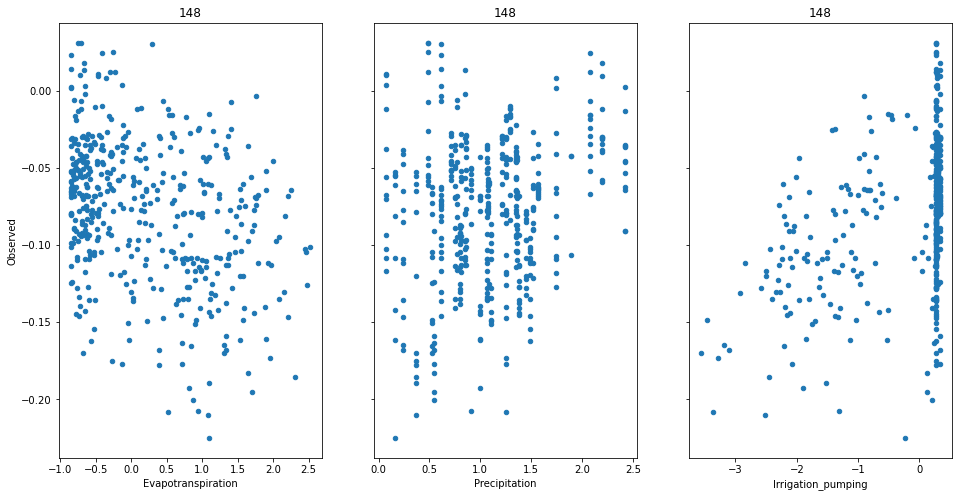

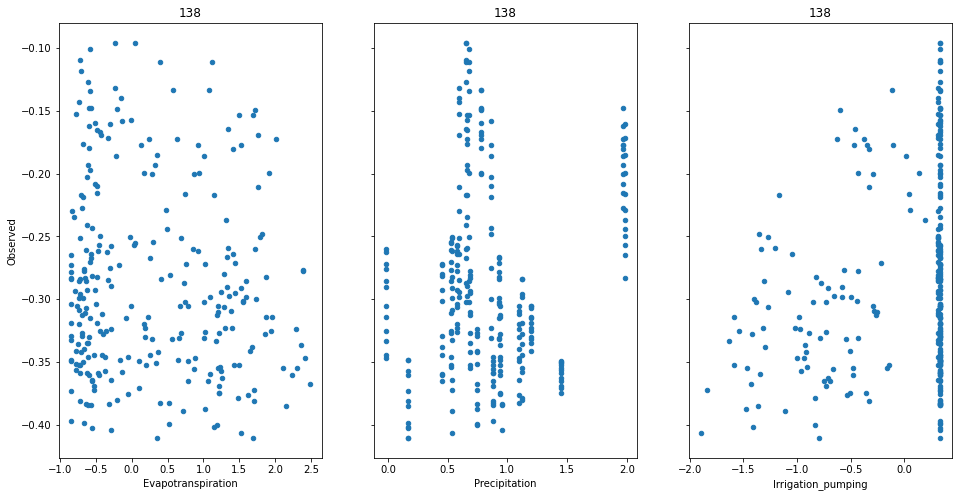

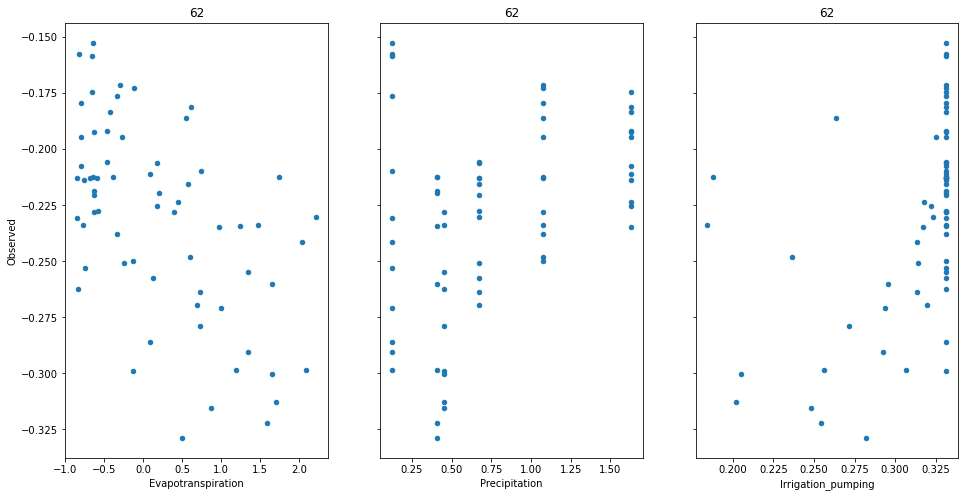

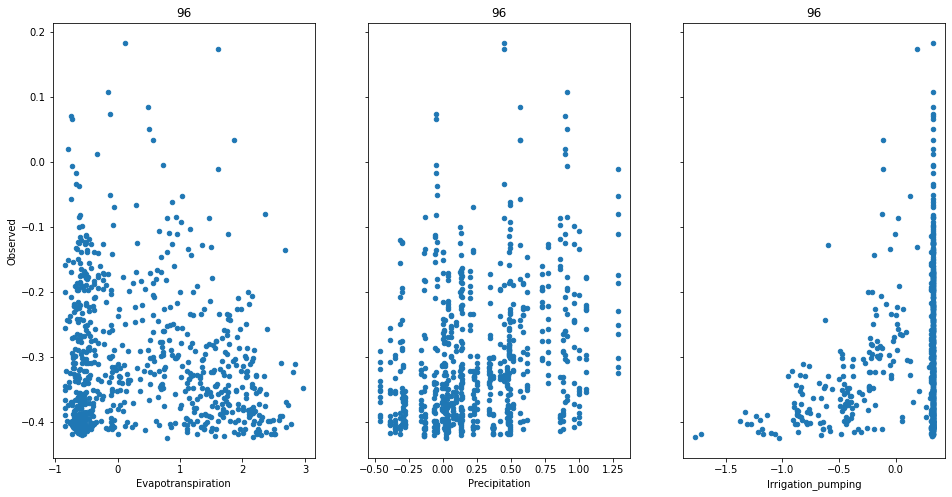

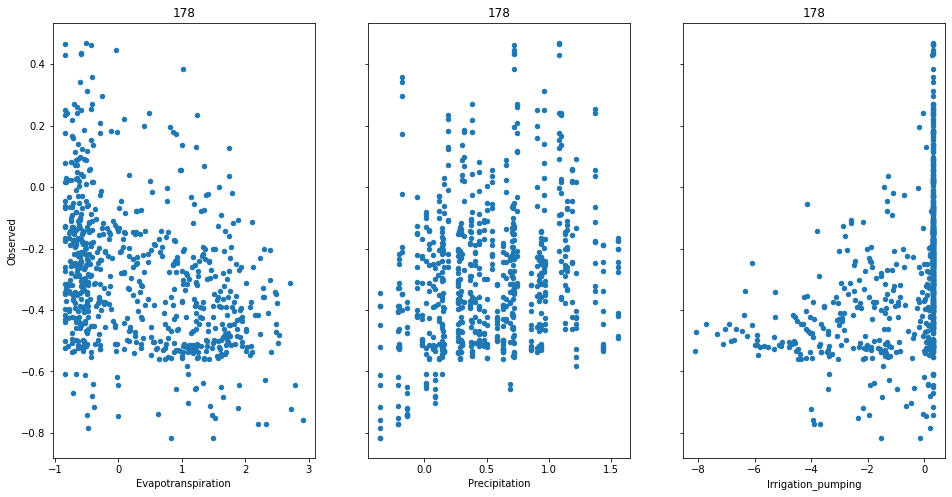

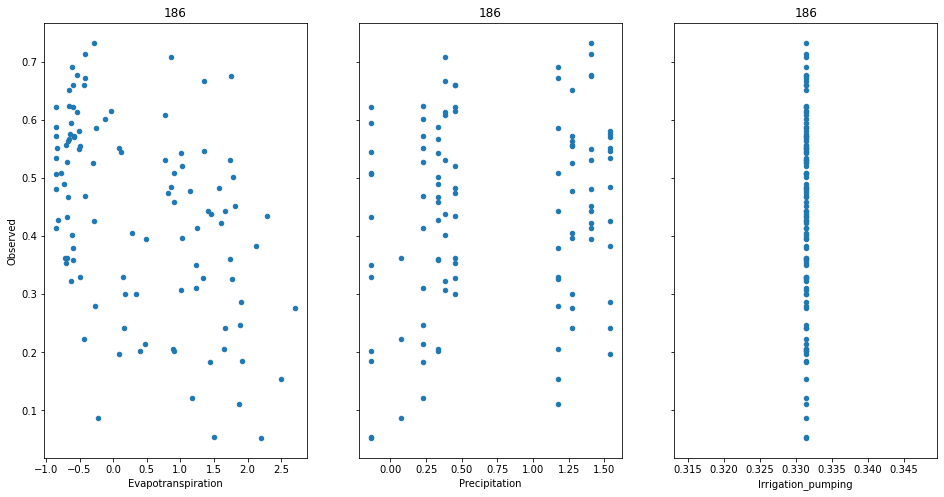

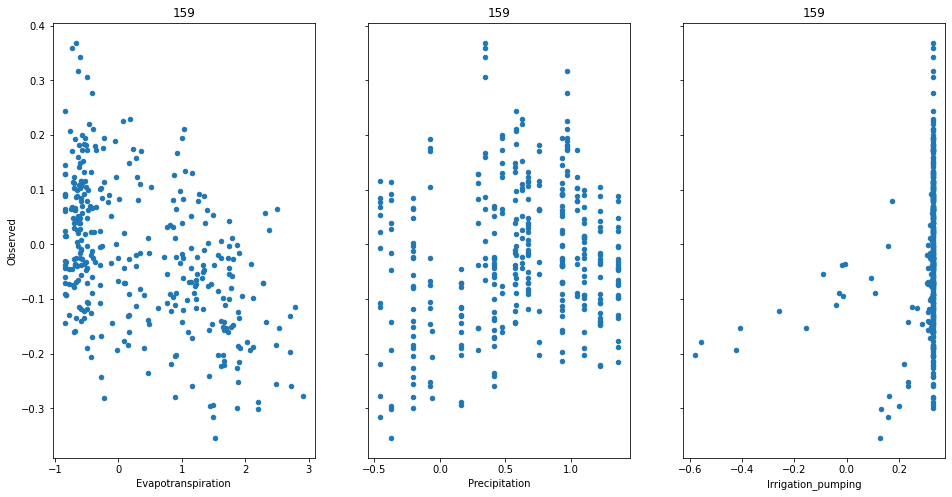

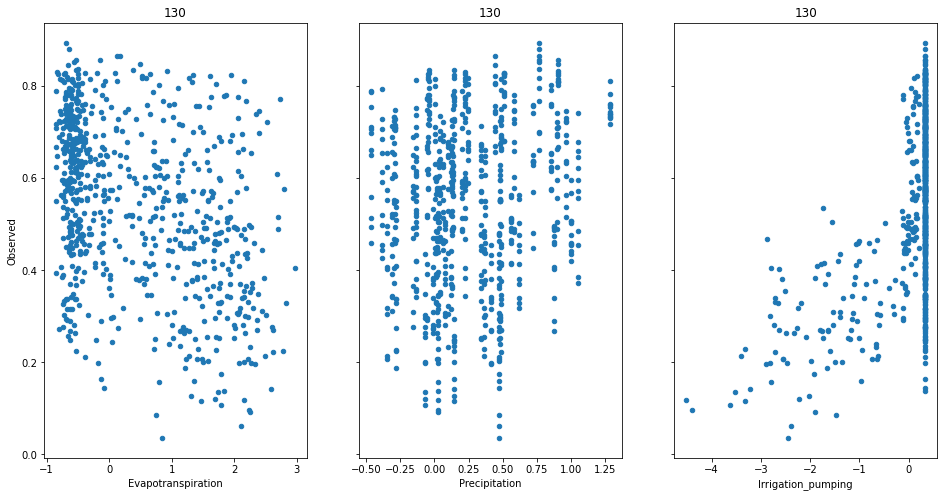

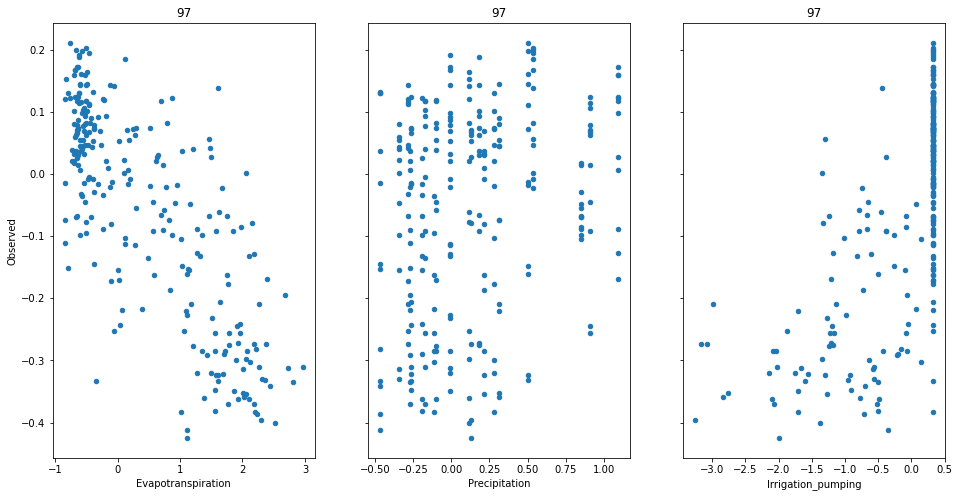

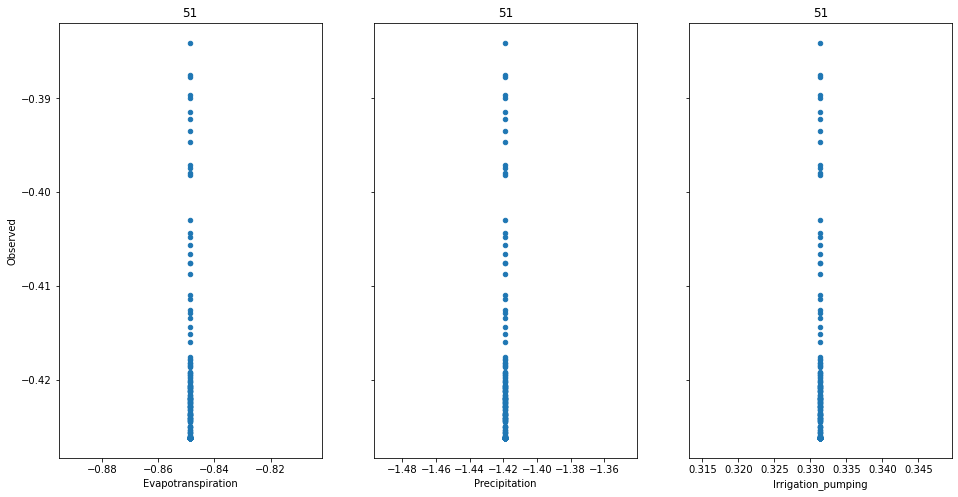

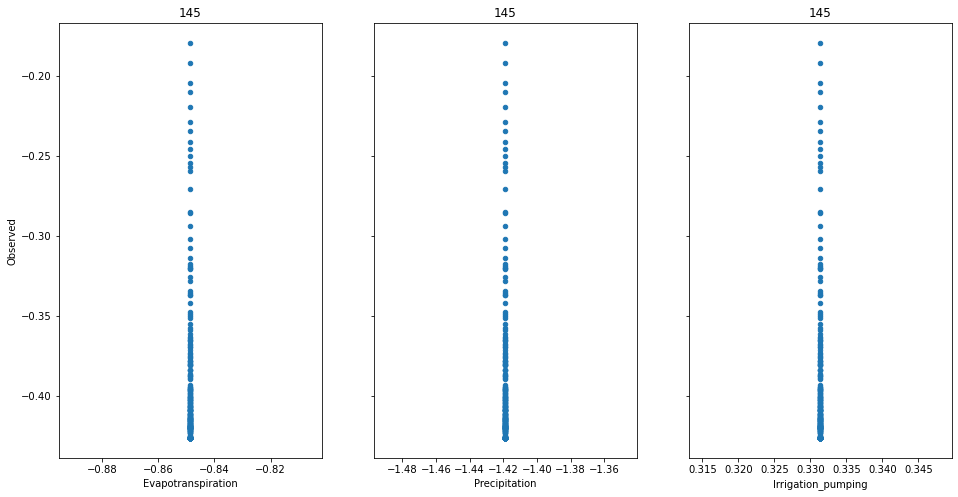

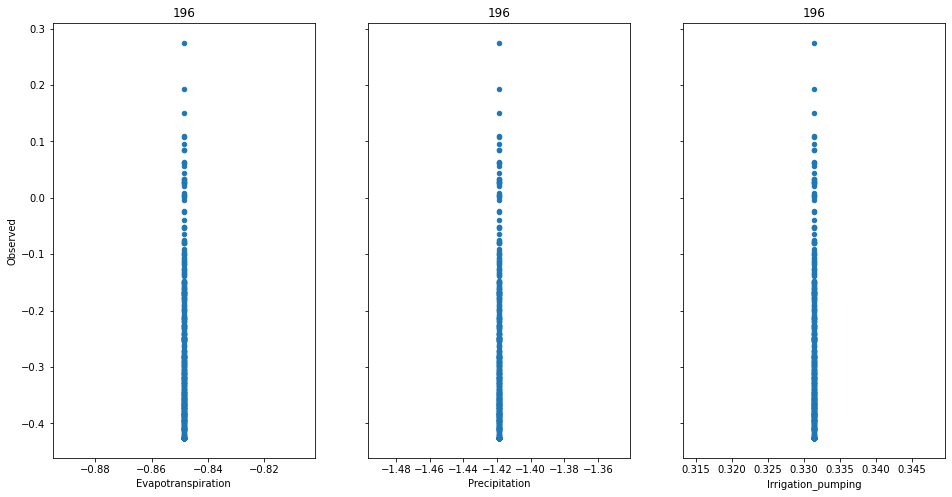

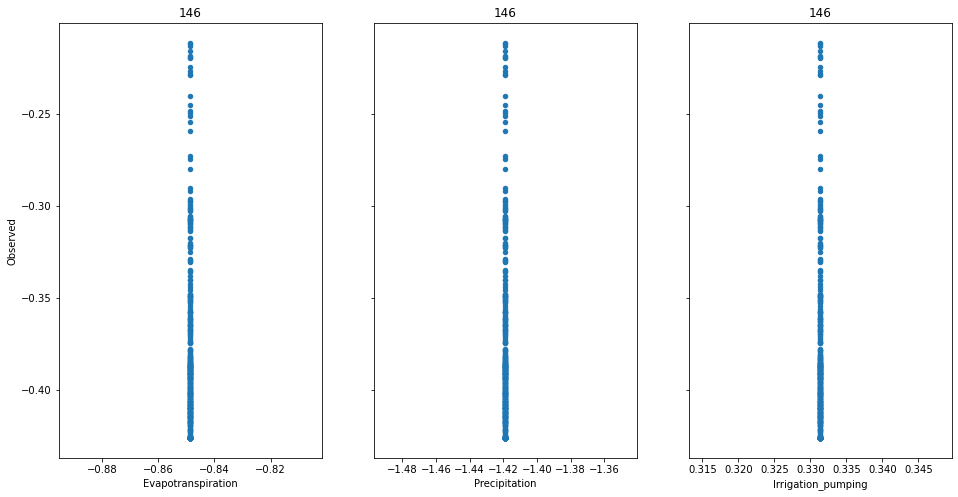

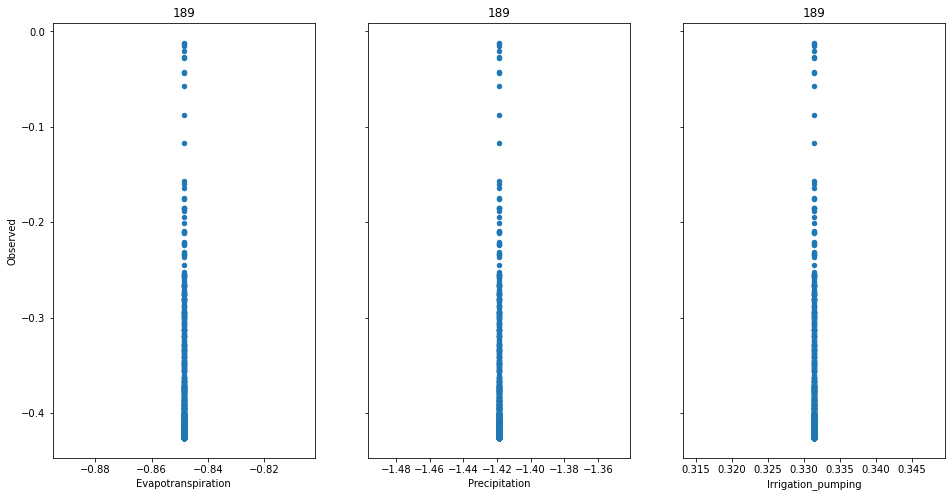

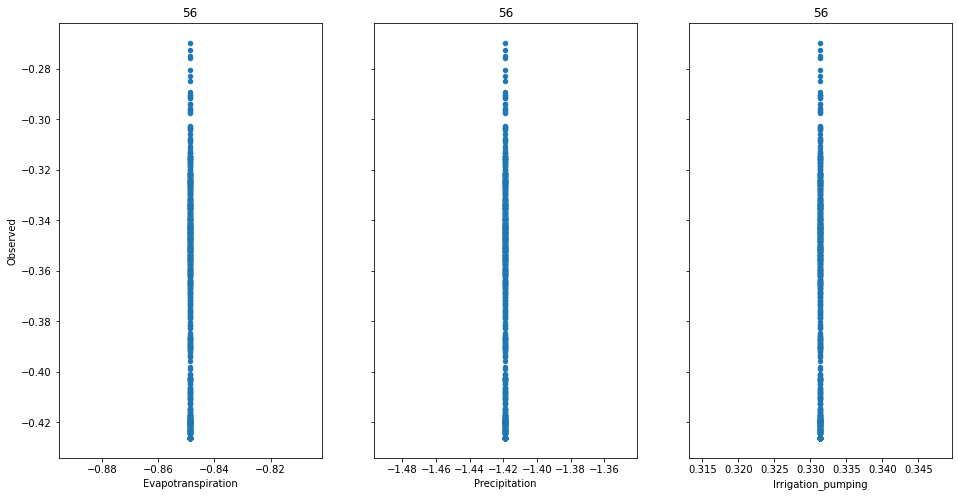

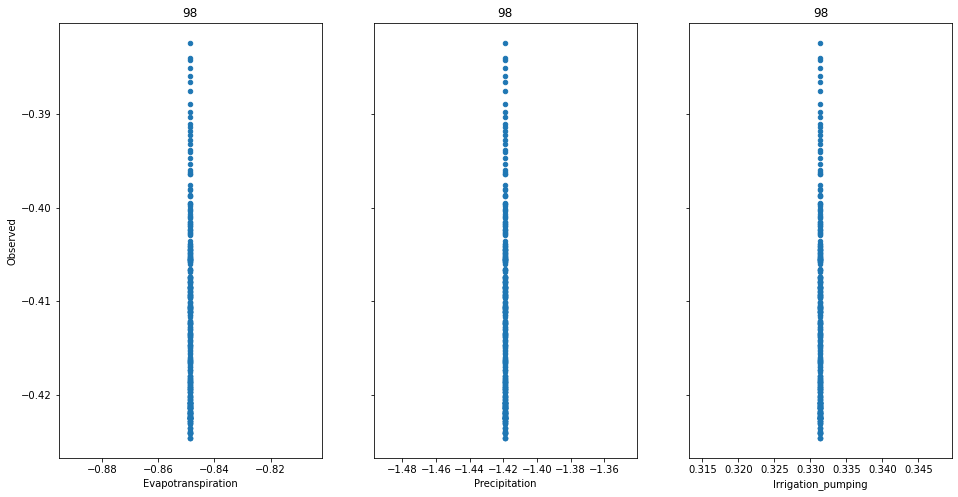

In [484]:
for seg in hydro_data.Segment_id.unique():
  df=hydro_data[hydro_data['Segment_id']==seg]
  fig, axs = plt.subplots(1, 3, sharey=True)
  df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8),title = seg)
  df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1],title = seg)
  df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2],title = seg)

In [485]:
means = hydro_data.groupby('Date').agg({'Evapotranspiration':'mean', 'Precipitation':'mean', 'Irrigation_pumping':'mean', 'Observed':'mean'}).reset_index().rename(columns={'Evapotranspiration':'Evapotranspiration_mean','Precipitation' : 'Precipitation_mean','Irrigation_pumping':'Irrigation_pumping_mean','Observed':'BF_mean' })

means.head()





,Date,Evapotranspiration_mean,Precipitation_mean,Irrigation_pumping_mean,BF_mean
0,1,-0.679590,-0.001523,0.324451,0.070343
1,2,-0.591502,-0.001523,0.324451,0.103936
2,3,-0.162234,0.004915,0.324415,0.104963
3,4,0.450268,0.004408,0.323259,0.072320
4,5,0.892748,0.002646,-0.272125,0.016245


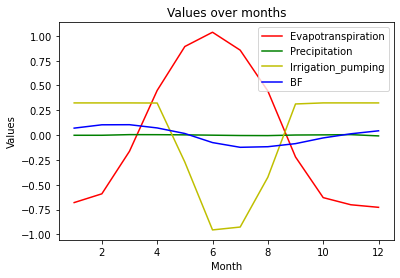

In [486]:
import matplotlib.pyplot as plt
plt.plot(means.Date, means.Evapotranspiration_mean, color='r', label='Evapotranspiration')
plt.plot(means.Date, means.Precipitation_mean, color='g', label='Precipitation')
plt.plot(means.Date, means.Irrigation_pumping_mean, color='y', label='Irrigation_pumping')
plt.plot(means.Date, means.BF_mean, color='b', label='BF')
plt.xlabel("Month")
plt.ylabel("Values")
plt.title("Values over months")
plt.legend()
plt.show()

In [487]:
hydro_data144 = hydro_data[hydro_data.Segment_id == 144]

In [488]:
hydro_data144

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,11,144,1086190,14476800,-0.662268,0.387587,0.331410,-0.423674
1,12,144,1086190,14476800,-0.542286,1.399708,0.331410,-0.418343
2,1,144,1086190,14476800,-0.425461,1.399708,0.331410,-0.402579
3,2,144,1086190,14476800,-0.283376,1.399708,0.331410,-0.374147
4,3,144,1086190,14476800,1.750008,1.399708,0.331410,-0.359993
...,...,...,...,...,...,...,...,...
113,12,144,1086190,14476800,-0.586490,0.069872,0.331410,-0.415706
114,1,144,1086190,14476800,-0.712787,0.069872,0.331410,-0.400012
115,2,144,1086190,14476800,-0.577017,0.069872,0.331410,-0.374245
116,3,144,1086190,14476800,0.395471,0.069872,0.331410,-0.376132


In [489]:

display(stats.pearsonr(hydro_data144.Observed, hydro_data144.Evapotranspiration))

(-0.19819840285108734, 0.031440067501277445)

In [490]:
means_seg = hydro_data.groupby('Segment_id').agg({'Evapotranspiration':'mean', 'Precipitation':'mean', 'Irrigation_pumping':'mean', 'Observed':'mean'}).reset_index().rename(columns={'Evapotranspiration':'Evapotranspiration_mean','Precipitation' : 'Precipitation_mean','Irrigation_pumping':'Irrigation_pumping_mean','Observed':'BF_mean' })

means_seg.head()

,Segment_id,Evapotranspiration_mean,Precipitation_mean,Irrigation_pumping_mean,BF_mean
0,40,0.140392,1.116282,-0.102276,-0.182477
1,51,-0.848556,-1.418822,0.331410,-0.424113
2,53,0.325481,0.519762,0.115732,0.672256
3,55,0.347736,0.568054,-0.336512,-0.400488
4,56,-0.848556,-1.418822,0.331410,-0.366330


/Users/supriyosadhya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Evapotranspiration', ylabel='Observed'>

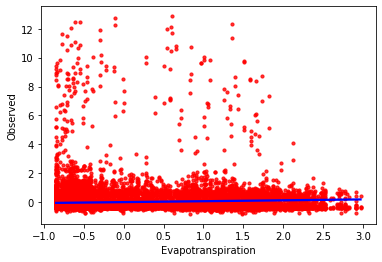

In [491]:
#sns.scatterplot(data=hydro_data, x='Evapotranspiration', y='Observed')
sns.regplot(hydro_data.Evapotranspiration, hydro_data.Observed, ci=None, marker='o', color='red',
           scatter_kws={'s':10}, line_kws={'color':'blue'})



/Users/supriyosadhya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precipitation', ylabel='Observed'>

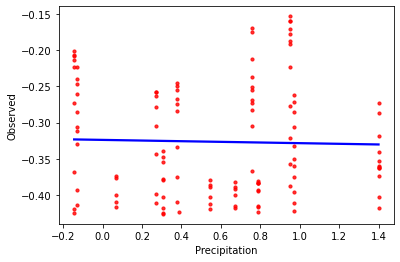

In [492]:
sns.regplot(hydro_data144.Precipitation, hydro_data144.Observed, ci=None, marker='o', color='red',
           scatter_kws={'s':10}, line_kws={'color':'blue'})

/Users/supriyosadhya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Evapotranspiration', ylabel='Observed'>

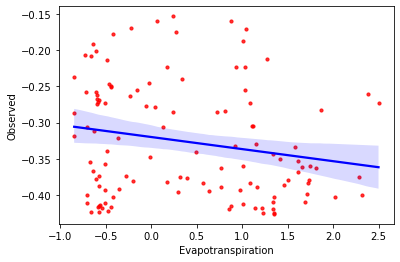

In [493]:
sns.regplot(hydro_data144.Evapotranspiration, hydro_data144.Observed, marker='o', color='red',
           scatter_kws={'s':10}, line_kws={'color':'blue'})

/Users/supriyosadhya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precipitation', ylabel='Observed'>

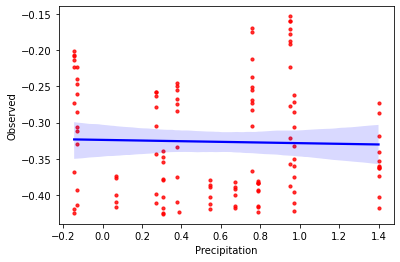

In [494]:
sns.regplot(hydro_data144.Precipitation, hydro_data144.Observed, marker='o', color='red',
           scatter_kws={'s':10}, line_kws={'color':'blue'})

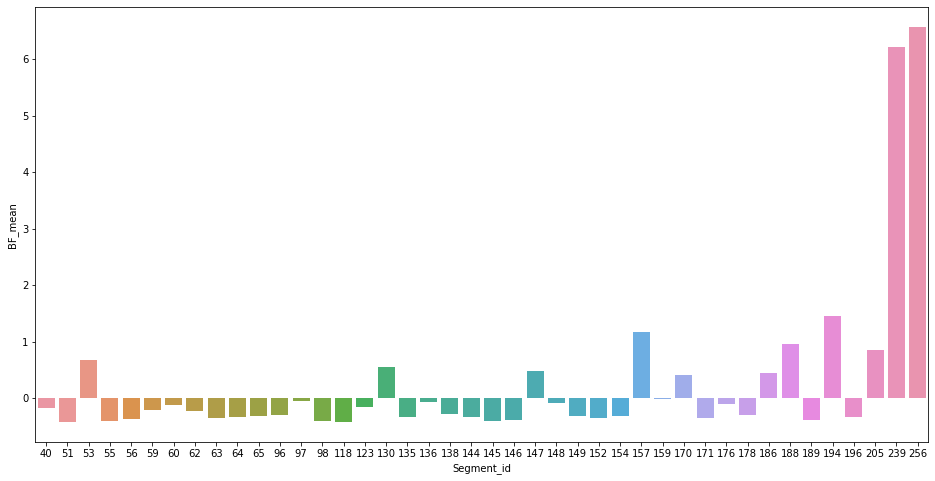

In [495]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=means_seg, x='Segment_id', y='BF_mean')

In [496]:
means_seg = means_seg.sort_values(by ='BF_mean', ascending=False).reset_index()

In [497]:
means_seg = means_seg[means_seg['BF_mean'] >= means_seg['BF_mean'].mean()]

In [498]:
means_seg

,index,Segment_id,Evapotranspiration_mean,Precipitation_mean,Irrigation_pumping_mean,BF_mean
0,41,256,0.133749,1.123456,0.331410,6.570247
1,40,239,0.133749,1.009563,0.284589,6.220433
2,37,194,0.340567,0.454808,0.319701,1.461804
3,28,157,0.323420,0.444053,0.313245,1.176278
4,35,188,0.331259,0.540806,-0.300326,0.957138
5,39,205,0.289860,0.659035,0.309747,0.851073
6,2,53,0.325481,0.519762,0.115732,0.672256
7,16,130,0.414070,0.259188,0.009736,0.543171
8,23,147,0.339029,0.436476,-0.184955,0.481683
9,34,186,0.354220,0.730932,0.331410,0.440467


In [499]:
# hydro_data = hydro_data[hydro_data['Segment_id'].isin(means_seg['Segment_id'].tolist())]

In [500]:
seg_hot = pd.get_dummies(hydro_data.Segment_id, prefix='s')
hydro_data = hydro_data.join(seg_hot)
seg_hot1 = pd.get_dummies(hydro_data.Date, prefix='d')
hydro_data = hydro_data.join(seg_hot1)

In [501]:
# from sklearn.preprocessing import StandardScaler
# cols = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']
# scaler = StandardScaler()
# hydro_data[cols] = scaler.fit_transform(hydro_data[cols])

In [502]:
hydro_data.drop(['Date','Segment_id'],axis=1, inplace=True)
hydro_data.head()

,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,s_40,s_51,s_53,s_55,...,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12
0,1086190,14476800,-0.662268,0.387587,0.33141,-0.423674,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1086190,14476800,-0.542286,1.399708,0.33141,-0.418343,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1086190,14476800,-0.425461,1.399708,0.33141,-0.402579,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1086190,14476800,-0.283376,1.399708,0.33141,-0.374147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1086190,14476800,1.750008,1.399708,0.33141,-0.359993,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [503]:
hydro_data.columns

Index(['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping',
       'Observed', 's_40', 's_51', 's_53', 's_55', 's_56', 's_59', 's_60',
       's_62', 's_63', 's_64', 's_65', 's_96', 's_97', 's_98', 's_118',
       's_123', 's_130', 's_135', 's_136', 's_138', 's_144', 's_145', 's_146',
       's_147', 's_148', 's_149', 's_152', 's_154', 's_157', 's_159', 's_170',
       's_171', 's_176', 's_178', 's_186', 's_188', 's_189', 's_194', 's_196',
       's_205', 's_239', 's_256', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
       'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12'],
      dtype='object')

In [504]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Evapotranspiration + Precipitation', data=hydro_data).fit()

# print the coefficients
display(lm.params)

# print a summary of 
lm.summary()
#lm.pvalues

Intercept             2.220446e-16
Irrigation_pumping    9.112685e-02
Evapotranspiration   -1.760577e-02
Precipitation         2.916643e-01
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     468.1
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          2.91e-291
Time:                        09:15:45   Log-Likelihood:                -21450.
No. Observations:               15591   AIC:                         4.291e+04
Df Residuals:                   15587   BIC:                         4.294e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            2.22e-16      0.008   2.89e-14      1.000      -0.015       0.015
Irrigation_pumping     0.0911      0.009     10.292      0.000       0.074       0.108
Evapotranspiration    -0.0176      0.010     -1.819      0.069      -0.037       0.001
Precipitation          0.2917      0.009     34.259      0.000       0.275       0.308
==============================================================================
Omnibus:                    19537.333   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2745873.800
Skew:                           6.987   Prob(JB):                         0.00
Kurtosis:                      66.495   Cond. No.                         2.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Evapotranspiration + Precipitation ', data=hydro_data).fit()

# print the coefficients
#display(lm.params)

# print a summary of 
display(lm.summary())
#display(lm.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     644.9
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          8.20e-270
Time:                        09:15:50   Log-Likelihood:                -21503.
No. Observations:               15591   AIC:                         4.301e+04
Df Residuals:                   15588   BIC:                         4.303e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            2.22e-16      0.008   2.88e-14      1.000      -0.015       0.015
Evapotranspiration    -0.0655      0.009     -7.686      0.000      -0.082      -0.049
Precipitation          0.2981      0.009     34.991      0.000       0.281       0.315
==============================================================================
Omnibus:                    19525.834   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2728780.499
Skew:                           6.982   Prob(JB):                         0.00
Kurtosis:                      66.290   Cond. No.                         1.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [506]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + x + y + d_1 + d_2 + d_3 + d_4 + d_5 + d_6 + d_7 + d_8 + d_9 + d_10 + d_11 + d_12', data=hydro_data).fit()

# print the coefficients
display(lm.params)

# print a summary of 
lm.summary()
#lm.pvalues

Intercept             4.052510e+00
Irrigation_pumping    8.125746e-02
Precipitation         2.939915e-01
Evapotranspiration    3.072925e-03
x                     2.975975e-07
y                    -3.252169e-07
d_1                   3.846580e-01
d_2                   4.179811e-01
d_3                   4.152203e-01
d_4                   3.809258e-01
d_5                   3.724220e-01
d_6                   3.368489e-01
d_7                   2.890822e-01
d_8                   2.560157e-01
d_9                   2.276868e-01
d_10                  2.852754e-01
d_11                  3.262213e-01
d_12                  3.601723e-01
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.28e-315
Time:                        09:16:00   Log-Likelihood:                -21359.
No. Observations:               15591   AIC:                         4.275e+04
Df Residuals:                   15574   BIC:                         4.288e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.0525      1.377      2.942      0.003       1.353       6.752
Irrigation_pumping     0.0813      0.009      8.704      0.000       0.063       0.100
Precipitation          0.2940      0.010     29.853      0.000       0.275       0.313
Evapotranspiration     0.0031      0.014      0.226      0.821      -0.024       0.030
x                   2.976e-07   2.73e-08     10.888      0.000    2.44e-07    3.51e-07
y                  -3.252e-07   1.03e-07     -3.168      0.002   -5.26e-07   -1.24e-07
d_1                    0.3847      0.119      3.235      0.001       0.152       0.618
d_2                    0.4180      0.119      3.522      0.000       0.185       0.651
d_3                    0.4152      0.118      3.530      0.000       0.185       0.646
d_4                    0.3809      0.117      3.263      0.001       0.152       0.610
d_5                    0.3724      0.117      3.195      0.001       0.144       0.601
d_6                    0.3368      0.117      2.882      0.004       0.108       0.566
d_7                    0.2891      0.117      2.470      0.014       0.060       0.519
d_8                    0.2560      0.117      2.186      0.029       0.026       0.486
d_9                    0.2277      0.118      1.930      0.054      -0.004       0.459
d_10                   0.2853      0.119      2.399      0.016       0.052       0.518
d_11                   0.3262      0.119      2.741      0.006       0.093       0.560
d_12                   0.3602      0.119      3.023      0.003       0.127       0.594
==============================================================================
Omnibus:                    18834.039   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2338060.969
Skew:                           6.573   Prob(JB):                         0.00
Kurtosis:                      61.534   Cond. No.                     1.83e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [507]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + x + y + s_188 + s_194 + s_205 + s_239 + s_256', data=hydro_data).fit()

# print the coefficients
display(lm.params)

# print a summary of 
lm.summary()
#lm.pvalues

Intercept            -2.200475e+01
Irrigation_pumping    4.790529e-02
Precipitation         9.970770e-02
Evapotranspiration   -3.565430e-02
x                    -3.883835e-07
y                     1.530847e-06
s_188                 1.019587e+00
s_194                 1.487531e+00
s_205                 8.519623e-01
s_239                 6.473819e+00
s_256                 6.971438e+00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4402.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:16:09   Log-Likelihood:                -11664.
No. Observations:               15591   AIC:                         2.335e+04
Df Residuals:                   15580   BIC:                         2.343e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.0048      0.811    -27.149      0.000     -23.593     -20.416
Irrigation_pumping     0.0479      0.005     10.082      0.000       0.039       0.057
Precipitation          0.0997      0.005     19.941      0.000       0.090       0.110
Evapotranspiration    -0.0357      0.005     -6.794      0.000      -0.046      -0.025
x                  -3.884e-07   1.51e-08    -25.652      0.000   -4.18e-07   -3.59e-07
y                   1.531e-06   5.58e-08     27.446      0.000    1.42e-06    1.64e-06
s_188                  1.0196      0.022     45.860      0.000       0.976       1.063
s_194                  1.4875      0.061     24.555      0.000       1.369       1.606
s_205                  0.8520      0.048     17.816      0.000       0.758       0.946
s_239                  6.4738      0.048    134.870      0.000       6.380       6.568
s_256                  6.9714      0.049    141.707      0.000       6.875       7.068
==============================================================================
Omnibus:                     5083.431   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1428382.875
Skew:                           0.004   Prob(JB):                         0.00
Kurtosis:                      49.891   Cond. No.                     2.89e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [508]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + x + y + s_188 + s_194 + s_205 + s_239 + s_256 + d_1 + d_2 + d_3 + d_4 + d_5 + d_6 + d_7 + d_8 + d_9 + d_10 + d_11 + d_12', data=hydro_data).fit()

# print the coefficients
display(lm.params)

# print a summary of 
lm.summary()
#lm.pvalues

Intercept            -2.059630e+01
Irrigation_pumping    3.769068e-02
Precipitation         1.036176e-01
Evapotranspiration   -5.072151e-02
x                    -3.942118e-07
y                     1.552403e-06
s_188                 1.019051e+00
s_194                 1.493596e+00
s_205                 8.544442e-01
s_239                 6.477969e+00
s_256                 6.978006e+00
d_1                  -1.692756e+00
d_2                  -1.654694e+00
d_3                  -1.630263e+00
d_4                  -1.631095e+00
d_5                  -1.643021e+00
d_6                  -1.700232e+00
d_7                  -1.760274e+00
d_8                  -1.784475e+00
d_9                  -1.829109e+00
d_10                 -1.792959e+00
d_11                 -1.753626e+00
d_12                 -1.723801e+00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2140.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:16:26   Log-Likelihood:                -11540.
No. Observations:               15591   AIC:                         2.312e+04
Df Residuals:                   15569   BIC:                         2.329e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.5963      0.746    -27.610      0.000     -22.059     -19.134
Irrigation_pumping     0.0377      0.005      7.555      0.000       0.028       0.047
Precipitation          0.1036      0.005     19.367      0.000       0.093       0.114
Evapotranspiration    -0.0507      0.007     -7.004      0.000      -0.065      -0.037
x                  -3.942e-07   1.54e-08    -25.670      0.000   -4.24e-07   -3.64e-07
y                   1.552e-06   5.56e-08     27.903      0.000    1.44e-06    1.66e-06
s_188                  1.0191      0.022     46.183      0.000       0.976       1.062
s_194                  1.4936      0.060     24.840      0.000       1.376       1.611
s_205                  0.8544      0.047     18.002      0.000       0.761       0.947
s_239                  6.4780      0.048    135.976      0.000       6.385       6.571
s_256                  6.9780      0.049    142.881      0.000       6.882       7.074
d_1                   -1.6928      0.064    -26.302      0.000      -1.819      -1.567
d_2                   -1.6547      0.064    -25.761      0.000      -1.781      -1.529
d_3                   -1.6303      0.064    -25.607      0.000      -1.755      -1.505
d_4                   -1.6311      0.063    -25.821      0.000      -1.755      -1.507
d_5                   -1.6430      0.063    -26.051      0.000      -1.767      -1.519
d_6                   -1.7002      0.063    -26.886      0.000      -1.824      -1.576
d_7                   -1.7603      0.063    -27.790      0.000      -1.884      -1.636
d_8                   -1.7845      0.063    -28.158      0.000      -1.909      -1.660
d_9                   -1.8291      0.064    -28.653      0.000      -1.954      -1.704
d_10                  -1.7930      0.064    -27.864      0.000      -1.919      -1.667
d_11                  -1.7536      0.064    -27.223      0.000      -1.880      -1.627
d_12                  -1.7238      0.064    -26.736      0.000      -1.850      -1.597
==============================================================================
Omnibus:                     5048.557   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1357892.523
Skew:                           0.023   Prob(JB):                         0.00
Kurtosis:                      48.719   Cond. No.                     1.43e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [510]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
feature_cols =['Irrigation_pumping', 'Precipitation','Evapotranspiration', 'x', 'y', 's_188', 's_194', 's_205', 's_239', 's_256', 'd_1', 'd_2', 'd_3', 'd_4','d_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12']
X = hydro_data[feature_cols]
y = hydro_data.Observed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

-21.814116044980437
[ 3.72121477e-02  1.04427902e-01 -5.28316109e-02 -3.91937555e-07
  1.51783844e-06  1.02305238e+00  1.51353946e+00  8.27857504e-01
  6.47407561e+00  6.84820158e+00  1.35748135e-02  6.00648224e-02
  9.46497998e-02  8.08429983e-02  7.18882336e-02  2.55941237e-02
 -3.62820343e-02 -7.03425874e-02 -1.08995240e-01 -8.24473853e-02
 -3.78624014e-02 -1.06851433e-02]
0.7425675445347442
0.7422892505116132
